import numpy as np
import astroplan
from astroplan import plots
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
%matplotlib inline

In [8]:
#astroplan.download_IERS_A()

In [2]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler

In [3]:
observer = astroplan.Observer.at_site('keck')

In [6]:
today = Time('2019-04-10 08:45:00', scale='utc')


In [9]:
twi12deg = observer.twilight_morning_nautical(today)
print(twi12deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print(twi18deg.iso)

pre_twi18deg = observer.twilight_evening_astronomical(today)

handoff = Time('2019-04-10 10:24:00', scale='utc')

2019-04-10 15:19:43.339
2019-04-10 14:53:23.279


#### Standards

In [10]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	B2IV
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	DOp

In [11]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, Feige110 ]

#### Choose Standards for the night

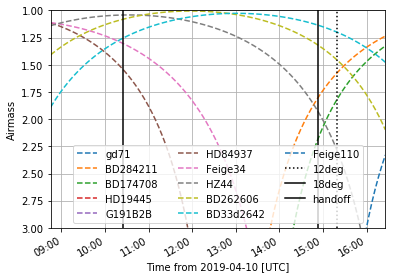

In [12]:
time = today+np.linspace(0, 0.32, 100)
plt.figure()
for istd in stds:
    plots.plot_airmass(istd, observer, time, style_kwargs={'linestyle':'--'})
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [13]:
chosen_stds = [HZ44, BD262606, BD33d2642]

#### Targets

In [14]:

sn2019uo = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2018gj  = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las  = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2017ivh = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017ivv = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit = (u.hourangle, u.degree)),
                                  name='2017ivv')

In [15]:
targets = [sn2019uo, sn2018gj,  sn2018aoq, sn2018las, sn2017ivh, 
           sn2017ivv]

#### Plot Objects for the night

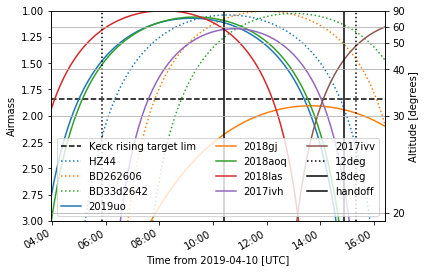

In [16]:

plt.close()
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

# Make a schedule

In [101]:
tab = """HZ44  13:23:35.26 +36:07:59.5  11.7 1x60
2018las   10:59:52.23 +19:47:41.8   19.5   1x900
2017ivh   13:39:36.25 -11:28:55.9   22   3x1200
2019uo    12:02:36.56 +41:03:42.3   21     1x1200
2018aoq   12:10:38.19 +39:23:47.0   20.8   1x1200
2018gj    16:32:02.40 +78:12:41.1   22   4x1200
2017ivv   20:28:49.84 -04:22:57.3   20.8   1x1200
BD33d2642 15:51:59.86 +32:56:54.8   10.81  1x30
HZ44  13:23:35.26 +36:07:59.5  11.7 1x60"""     

In [102]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [103]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [104]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
HZ44,13:23:35.26,+36:07:59.5,11.7,1x60,1.0,60.0
2018las,10:59:52.23,+19:47:41.8,19.5,1x900,1.0,900.0
2017ivh,13:39:36.25,-11:28:55.9,22,3x1200,3.0,1200.0
2019uo,12:02:36.56,+41:03:42.3,21,1x1200,1.0,1200.0
2018aoq,12:10:38.19,+39:23:47.0,20.8,1x1200,1.0,1200.0
2018gj,16:32:02.40,+78:12:41.1,22,4x1200,4.0,1200.0
2017ivv,20:28:49.84,-04:22:57.3,20.8,1x1200,1.0,1200.0
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0
HZ44,13:23:35.26,+36:07:59.5,11.7,1x60,1.0,60.0


In [105]:
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [106]:
tbdata['start'] = obs_start[:-1]

In [107]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object
HZ44,13:23:35.26,+36:07:59.5,11.7,1x60,1.0,60.0,2019-04-10 10:24:00.000
2018las,10:59:52.23,+19:47:41.8,19.5,1x900,1.0,900.0,2019-04-10 10:30:00.000
2017ivh,13:39:36.25,-11:28:55.9,22,3x1200,3.0,1200.0,2019-04-10 10:50:00.000
2019uo,12:02:36.56,+41:03:42.3,21,1x1200,1.0,1200.0,2019-04-10 11:59:14.000
2018aoq,12:10:38.19,+39:23:47.0,20.8,1x1200,1.0,1200.0,2019-04-10 12:24:14.000
2018gj,16:32:02.40,+78:12:41.1,22,4x1200,4.0,1200.0,2019-04-10 12:49:14.000
2017ivv,20:28:49.84,-04:22:57.3,20.8,1x1200,1.0,1200.0,2019-04-10 14:20:35.000
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0,2019-04-10 14:45:35.000
HZ44,13:23:35.26,+36:07:59.5,11.7,1x60,1.0,60.0,2019-04-10 14:51:05.000


In [108]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

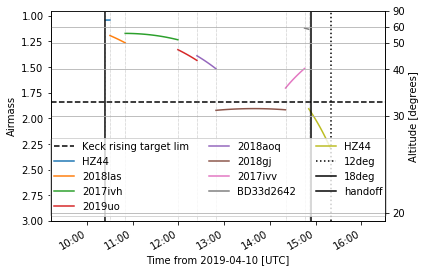

In [109]:
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

# Backup targets:

2018hmx  08:33:39.34 +55:35:53.0  18.5    2x600

In [22]:
backup_tab = '''HD84937  09:48:56.09 +13:44:39.3   8.3    1x10
placeholder 00:00:00.00 00:00:00.0 99     1x3600
2018is   13:16:57.35 -16:37:04.4   22     7x1200
2018aoz  11:51:01.79 -28:44:38.4   20     2x900
2018gep  16:43:48.20 +41:02:43.3   19.75  2x900
BD33d2642 15:51:59.86 +32:56:54.8  10.81  1x30
Feige34  10:39:36.74 +43:06:09.3   11.3   1x60'''

In [23]:
backup_row_list = backup_tab.split('\n')
backup_tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in backup_row_list:
    backup_tbdata.add_row(irow.split())

In [24]:
backup_nexp = []
backup_exptime = []
for irow in backup_tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    backup_nexp.append(float(inexp))
    backup_exptime.append(float(iexptime))
backup_tbdata['nexp'] = backup_nexp
backup_tbdata['exptime'] = backup_exptime

In [25]:
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
backup_obs_start = [night_start]
backup_start_time = night_start
for irow in backup_tbdata:
    backup_start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    backup_obs_start.append(backup_start_time)

In [26]:
backup_tbdata['start'] = backup_obs_start[:-1]

In [27]:
backup_tbdata.write('../backup_plan.txt', format='ascii.fixed_width', overwrite=True)

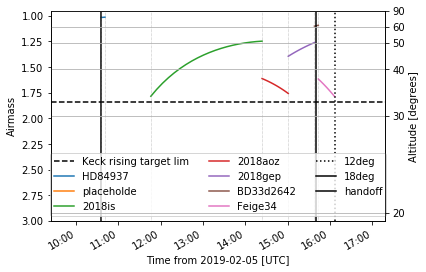

In [28]:
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = backup_tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(backup_tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in backup_tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('backup_schedule.pdf')

In [29]:
backup_tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object
HD84937,09:48:56.09,+13:44:39.3,8.3,1x10,1.0,10.0,2019-02-05 10:36:00.000
placeholde,00:00:00.00,00:00:00.0,99,1x3600,1.0,3600.0,2019-02-05 10:41:10.000
2018is,13:16:57.35,-16:37:04.4,22,7x1200,7.0,1200.0,2019-02-05 11:46:10.000
2018aoz,11:51:01.79,-28:44:38.4,20,2x900,2.0,900.0,2019-02-05 14:23:52.000
2018gep,16:43:48.20,+41:02:43.3,19.75,2x900,2.0,900.0,2019-02-05 15:00:59.000
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0,2019-02-05 15:38:06.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2019-02-05 15:43:36.000


In [30]:
twi18deg.iso

'2019-02-05 15:40:36.422'

In [32]:
pre_twi18deg.iso

'2019-02-05 05:30:59.907'